In [1]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Diretório onde se encontram os arquivos

In [2]:
os.chdir("/Users/LENOVO/Documents/Evasao/ALCC")

# Através da biblioteca glob é possível agrupar pelo padrão do arquivo, neste caso xlsx

In [3]:
extension = 'xlsx'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]


# Com a biblioteca pandas é possível concatenar os arquivos existentes no diretório, ou seja, fazer a junção destes em um só, facilitando a manipulação no Python.

In [4]:
df= pd.concat([pd.read_excel(f) for f in all_filenames ])

# Método para verificar o tamanho do arquivo

In [5]:
len(df)

7719

# Gráfico de barras empilhadas com  níveis de agrupamento, percentagens normalizadas para 100%

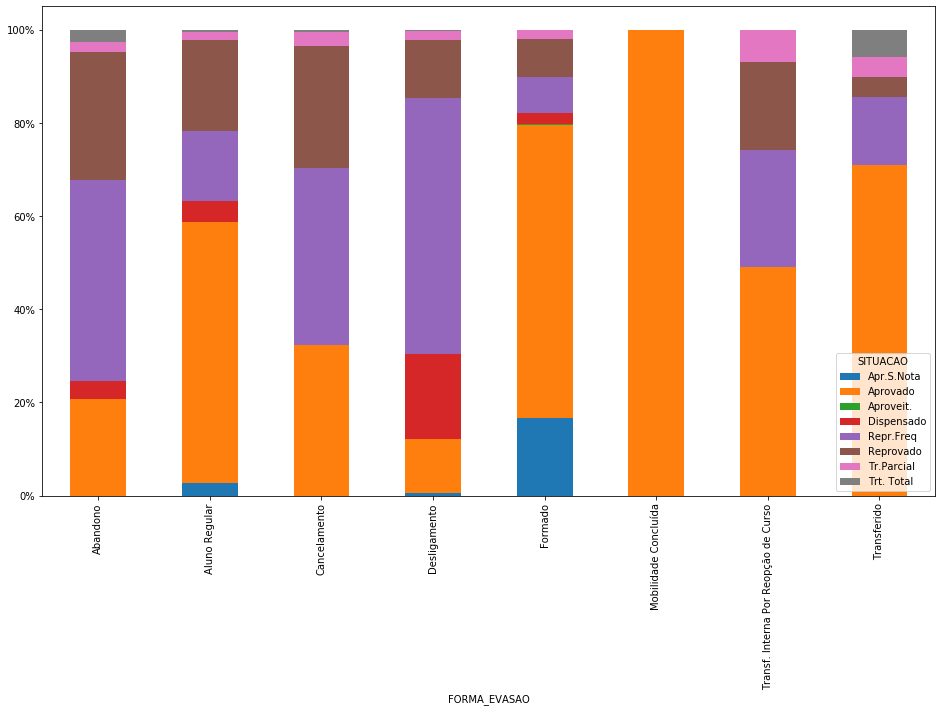

In [7]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

df.groupby(['FORMA_EVASAO','SITUACAO']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).unstack().plot(kind='bar',stacked=True)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# Gráfico de barras empilhadas com apenas um agrupamento, percentagens normalizadas em 100%
Se você deseja plotar um contador de percentagem para valores com um único agrupamento, é necessário:

Criar uma variável auxiliar e fazer um agrupamento de dois níveis baseado nela
corrigir o rótulo do eixo e a legenda


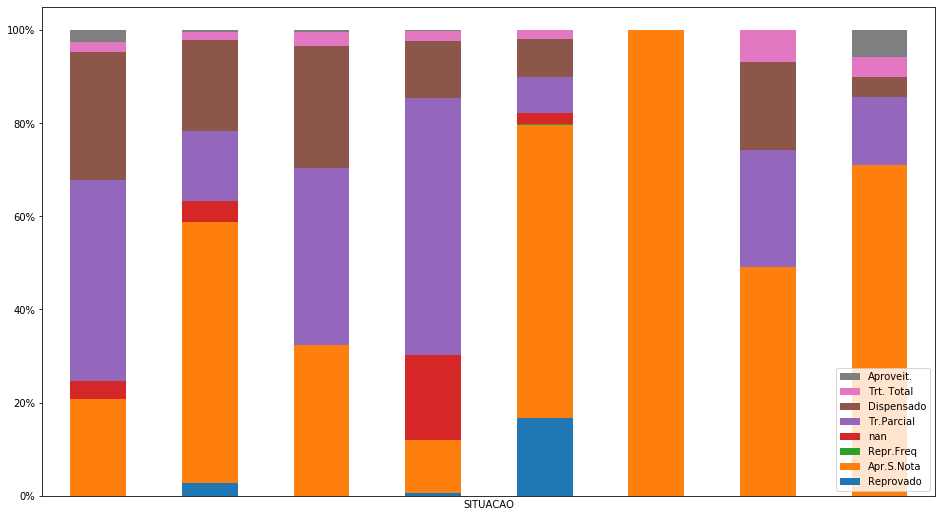

In [10]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams["figure.figsize"] = [16,9]

# Criar uma variável auxiliar e agrupa por ela
# Colocar a legenda como false para corrigirmos depois

df.assign(
 auxiliar = 1   
).groupby(['FORMA_EVASAO','SITUACAO']).size().groupby(level=0).apply(
    lambda x: 100 * x / x.sum()
).to_frame().unstack().plot(kind='bar',stacked=True,legend=False)

# necessário alterar para estado, caso contrário aparecerá como auxiliar
plt.xlabel('SITUACAO')

# desabilitar ticks no eixo x
plt.xticks([])

# corrigir a legenda para não incluir a variável auxiliar
current_handles, _ = plt.gca().get_legend_handles_labels()
reversed_handles = reversed(current_handles)
correct_labels = reversed(df['SITUACAO'].unique())

plt.legend(reversed_handles,correct_labels)

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show()

# Estatística descritiva - Utilizando Pandas

# Computa a covariância entre as séries do DataFrame, o DataFrame retornado é a matriz de covariância das colunas do DataFrame:
df.cov()

# Computa a correlação de colunas emparelhadas: 
df.corr()

# Gere estatísticas descritivas que resumem a tendência central, dispersão e forma da distribuição de um conjunto de dados, excluindo NaN valores (Obter a média, valores mínimos e máximos, desvio padrão).
df.describe()
